In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_train=pd.read_csv("titanictrain.csv")
df_test=pd.read_csv("titanictest.csv")

In [2]:
df_train.shape , df_test.shape

((891, 12), (418, 11))

In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_raw=pd.concat([df_train,df_test],axis=0,sort=False)

In [5]:
df_raw.shape

(1309, 12)

In [6]:
df_raw.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

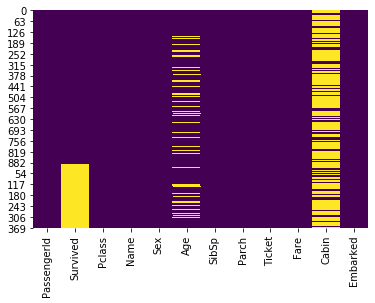

In [7]:
sns.heatmap(df_raw.isnull(),cbar=False,cmap='viridis')

In [8]:
df_raw.Age.isnull().sum()/len(df_raw)*100

20.091673032849503

In [9]:
df_raw.Cabin.isnull().sum()/len(df_raw)*100

77.46371275783041

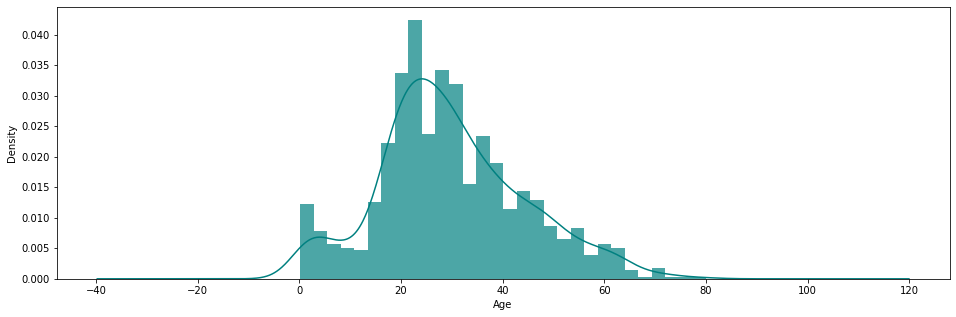

In [10]:
ax = df_raw['Age'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.7, figsize = (16, 5))
df_raw['Age'].plot(kind = 'density', color = 'teal')
ax.set_xlabel('Age')
plt.show()

Text(0.5, 1.0, 'Male')

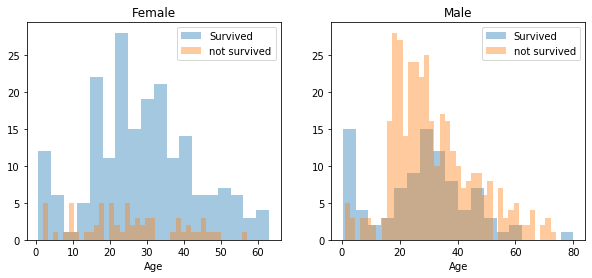

In [11]:
survived = 'Survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
women = df_raw[df_raw['Sex'] == 'female']
men = df_raw[df_raw['Sex'] == 'male']


ax = sns.distplot(women[women[survived]==1].Age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women[survived]==0].Age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')


ax = sns.distplot(men[men[survived]==1].Age.dropna(), bins = 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men[survived]==0].Age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

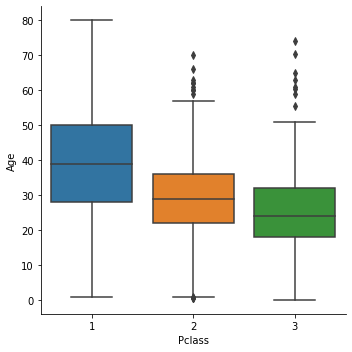

In [12]:
sns.catplot(x = 'Pclass', y = 'Age', data = df_raw, kind = 'box')

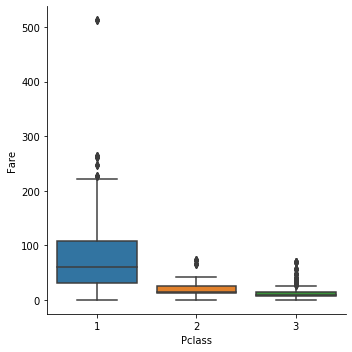

In [13]:
sns.catplot(x = 'Pclass', y = 'Fare', data = df_raw, kind = 'box')

In [14]:
print(df_raw[df_raw['Pclass'] == 1]['Age'].mean())
print(df_raw[df_raw['Pclass'] == 2]['Age'].mean())
print(df_raw[df_raw['Pclass'] == 3]['Age'].mean())

39.15992957746479
29.506704980842912
24.81636726546906


In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return df_raw[df_raw['Pclass'] == 1]['Age'].mean()
        elif Pclass == 2:
            return df_raw[df_raw['Pclass'] == 2]['Age'].mean()
        elif Pclass == 3:
            return df_raw[df_raw['Pclass'] == 3]['Age'].mean()
        
    else:
        return Age

In [16]:
df_raw['Age'] = df_raw[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [17]:
df_raw['Fare']=df_raw['Fare'].fillna(df_raw['Fare'].mean())

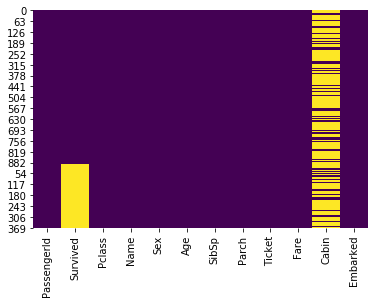

In [18]:
sns.heatmap(df_raw.isnull(), cbar = False, cmap = 'viridis')

In [19]:
df_raw.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [20]:
df_raw['Embarked'].fillna('S', inplace = True)

In [21]:
df_raw.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
genders = {'male': 0, 'female': 1}
df_raw['Sex'] = df_raw['Sex'].map(genders)

ports = {'S': 0, 'C': 1, 'Q': 2}
df_raw['Embarked'] = df_raw['Embarked'].map(ports)

In [23]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [24]:
df_raw['Title']=df_raw['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [25]:
df_raw.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Ms            2
Mlle          2
Sir           1
Capt          1
Jonkheer      1
Lady          1
Dona          1
Countess      1
Mme           1
Don           1
Name: Title, dtype: int64

In [26]:
Title_mapping={"Mr": 0, "Miss": 1, "Mrs": 2, 
               "Master": 3, "Dr": 3, "Rev": 3, "Col": 3,
               "Major": 3, "Mlle": 3,"Countess": 3,
               "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, 
               "Mme": 3,"Capt": 3,"Sir": 3 }
df_raw['Title']=df_raw['Title'].map(Title_mapping)

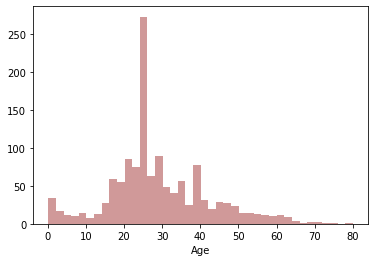

In [27]:
sns.distplot(df_raw['Age'].dropna(),kde=False,color='darkred',bins=40)

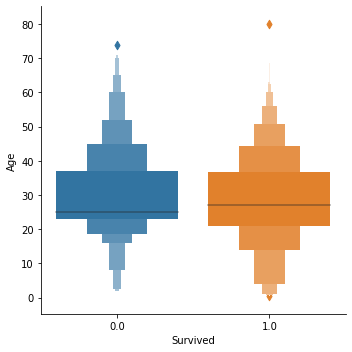

In [28]:
sns.catplot(x = 'Survived', y = 'Age', kind = 'boxen', data = df_raw.sort_values('Age'))

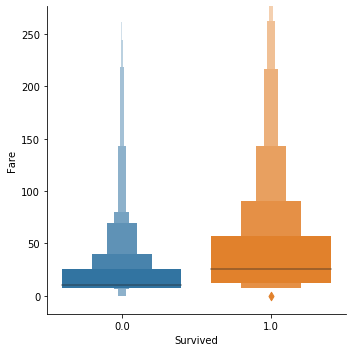

In [29]:
sns.catplot(x = 'Survived', y = 'Fare', kind = 'boxen', data = df_raw.sort_values('Fare'))

In [30]:
df_raw.loc[ df_raw['Age'] <= 16, 'Age'] = 0,
df_raw.loc[(df_raw['Age'] > 16) & (df_raw['Age'] <= 32), 'Age'] = 1,
df_raw.loc[(df_raw['Age'] >32) & (df_raw['Age'] <= 48), 'Age'] = 2,
df_raw.loc[(df_raw['Age'] > 48) & (df_raw['Age'] <= 64), 'Age'] = 3,
df_raw.loc[ df_raw['Age'] > 64, 'Age'] = 4

In [31]:
df_raw.loc[ df_raw['Fare'] <= 17, 'Fare'] = 0,
df_raw.loc[(df_raw['Fare'] > 17) & (df_raw['Fare'] <= 30), 'Fare'] = 1,
df_raw.loc[(df_raw['Fare'] > 30) & (df_raw['Fare'] <= 100), 'Fare'] = 2,
df_raw.loc[ df_raw['Fare'] > 100, 'Fare'] = 3

In [32]:
df_raw['Cabin']=df_raw['Cabin'].str.extract('([A-Z])', expand=False)

In [33]:
df_raw['Cabin'].fillna('NA', inplace = True)

In [34]:
df_raw['Has_Cabin']=df_raw['Cabin'].apply(lambda x: 0 if x == 'NA' else 1)

In [35]:
df_raw['FamilySize']=df_raw['SibSp'] + df_raw['Parch'] + 1

In [36]:
df_raw.Cabin.value_counts()

NA    1014
C       94
B       65
D       46
E       41
A       22
F       21
G        5
T        1
Name: Cabin, dtype: int64

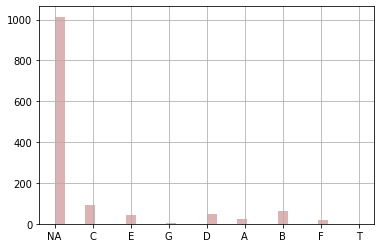

In [37]:
df_raw['Cabin'].hist(bins=30,color='darkred',alpha=0.3)

In [38]:
cabin_mapping = {"A": 5, "B": 2, "C": 1, "D": 3, "E": 4, "F": 6, "G": 7, "T": 8 , "NA":0}
df_raw['Cabin'] = df_raw['Cabin'].map(cabin_mapping)

In [39]:
df_raw.drop(['Name','Ticket'],axis=1,inplace=True)

In [40]:
df_raw['Age'] = df_raw['Age'].astype('int')
df_raw['Pclass'] = df_raw['Pclass'].astype('int')
df_raw['Fare'] = df_raw['Fare'].astype('int')

In [42]:
df_raw.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Has_Cabin,FamilySize
0,1,0.0,3,0,1,1,0,0,0,0,0,0,2
1,2,1.0,1,1,2,1,0,2,1,1,2,1,2
2,3,1.0,3,1,1,0,0,0,0,0,1,0,1
3,4,1.0,1,1,2,1,0,2,1,0,2,1,2
4,5,0.0,3,0,2,0,0,0,0,0,0,0,1


In [43]:
df_train.shape,df_test.shape,df_raw.shape

((891, 12), (418, 11), (1309, 13))

In [44]:
df_valid=df_raw.iloc[:891,:]
df_test=df_raw.iloc[891:,:]

In [45]:
df_valid.shape,df_test.shape

((891, 13), (418, 13))

In [46]:
df_test.drop('Survived',axis=1,inplace=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
df_train = df_valid.drop('Survived', axis=1)
target = df_valid['Survived']
df_train.shape, target.shape

((891, 12), (891,))

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size = 0.2, random_state = 8, stratify = target)
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8324022346368715

In [50]:
print("F1 Score : ",f1_score(y_test,y_pred))
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test,y_pred))
print("Recall Score : ",recall_score(y_test,y_pred))
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred))

F1 Score :  0.782608695652174
Accuracy Score :  0.8324022346368715
Precision Score :  0.782608695652174
Recall Score :  0.782608695652174
Confusion Matrix :  [[95 15]
 [15 54]]


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


n_estimators = [200, 300, 400, 500, 600]
max_features = ['auto', 'sqrt']
max_depth = [20,40,50,60,80]
min_samples_split = [2, 5, 10,15,20]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_cv = RandomizedSearchCV(estimator = RandomForestClassifier(), 
            param_distributions = random_grid, n_iter = 50,
            scoring = 'neg_mean_absolute_error', cv = 5, 
            verbose=5, random_state=42, n_jobs = -1,return_train_score = True)

random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   40.2s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [52]:
random_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
m=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
m.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
y_pred2=m.predict(X_test)

In [56]:
print("F1 Score : ",f1_score(y_test,y_pred2))
print("Accuracy Score : ",accuracy_score(y_test,y_pred2))
print("Precision Score : ",precision_score(y_test,y_pred2))
print("Recall Score : ",recall_score(y_test,y_pred2))
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred2))

F1 Score :  0.7969924812030075
Accuracy Score :  0.8491620111731844
Precision Score :  0.828125
Recall Score :  0.7681159420289855
Confusion Matrix :  [[99 11]
 [16 53]]


In [57]:
def feat_importance(model, df):
    return pd.DataFrame({'Columns':df.columns, 'Imp_Features':model.feature_importances_}
                       ).sort_values('Imp_Features', ascending=False)

In [58]:
feat_importance(m,X_train)

,Columns,Imp_Features
9,Title,0.284507
2,Sex,0.211932
0,PassengerId,0.091949
1,Pclass,0.083605
11,FamilySize,0.069997
7,Cabin,0.057822
10,Has_Cabin,0.043826
6,Fare,0.039924
3,Age,0.035302
4,SibSp,0.032545


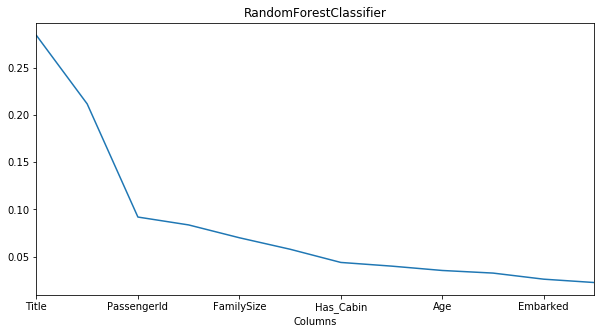

In [59]:
Fi_rfc=feat_importance(m,X_train)
Fi_rfc.plot('Columns', 'Imp_Features', figsize=(10,5), legend=False,title='RandomForestClassifier')

In [60]:
X = df_valid.drop('Survived', axis=1)
y = df_valid['Survived']
random_cv.fit(X,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   41.9s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [61]:
random_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
n=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
n.fit(X,y)
y_final=n.predict(df_test)

In [63]:
Final_df=pd.DataFrame()
Final_df['PassengerID']=df_test['PassengerId']
Final_df['Survived']=y_final
Final_df.to_csv(r'C:\Users\lenovo\Desktop\IMS PRO\gender_submission.csv',index=False)